In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline


In [111]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_excel("SUUMOスクレイピング.xlsx")

In [113]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
data.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積,URL
0,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/千歳烏山駅 歩11分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...
1,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/芦花公園駅 歩20分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...
2,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/仙川駅 歩23分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...
3,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/千歳船橋駅 歩6分,築3年,3階建,2階,18万円,5000円,-,36万円,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...
4,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/経堂駅 歩12分,築3年,3階建,2階,18万円,5000円,-,36万円,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144624 entries, 0 to 144623
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   名称      144624 non-null  object
 1   カテゴリー   144624 non-null  object
 2   アドレス    144624 non-null  object
 3   アクセス    144624 non-null  object
 4   築年数     144624 non-null  object
 5   構造      144624 non-null  object
 6   階数      144624 non-null  object
 7   家賃      144624 non-null  object
 8   管理費     144624 non-null  object
 9   敷金      144624 non-null  object
 10  礼金      144624 non-null  object
 11  間取り     144624 non-null  object
 12  面積      144624 non-null  object
 13  URL     144624 non-null  object
dtypes: object(14)
memory usage: 15.4+ MB


In [5]:
#データの整形

In [6]:
#徒歩を別セルに分割
data["徒歩分"] = data["アクセス"].apply(lambda x : x.split(" ")[1])
data["徒歩"] = data["徒歩分"].apply(lambda x : x.split('分')[0])
data["walk"] = data["徒歩"].apply(lambda x : x.split('歩')[1])
data.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積,URL,徒歩分,徒歩,walk
0,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/千歳烏山駅 歩11分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩11分,歩11,11
1,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/芦花公園駅 歩20分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩20分,歩20,20
2,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/仙川駅 歩23分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩23分,歩23,23
3,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/千歳船橋駅 歩6分,築3年,3階建,2階,18万円,5000円,-,36万円,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩6分,歩6,6
4,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/経堂駅 歩12分,築3年,3階建,2階,18万円,5000円,-,36万円,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩12分,歩12,12


In [7]:
#数字型で保管
data["walk"] = data["walk"].astype(np.int)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144624 entries, 0 to 144623
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   名称      144624 non-null  object
 1   カテゴリー   144624 non-null  object
 2   アドレス    144624 non-null  object
 3   アクセス    144624 non-null  object
 4   築年数     144624 non-null  object
 5   構造      144624 non-null  object
 6   階数      144624 non-null  object
 7   家賃      144624 non-null  object
 8   管理費     144624 non-null  object
 9   敷金      144624 non-null  object
 10  礼金      144624 non-null  object
 11  間取り     144624 non-null  object
 12  面積      144624 non-null  object
 13  URL     144624 non-null  object
 14  徒歩分     144624 non-null  object
 15  徒歩      144624 non-null  object
 16  walk    144624 non-null  int64 
dtypes: int64(1), object(16)
memory usage: 18.8+ MB


/var/folders/9j/g3nm72s54g5df75_4gzcrxth0000gn/T/ipykernel_56606/27690869.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data["walk"] = data["walk"].astype(np.int)


In [8]:
#家賃を別セルに分割
data["家賃金額"] = data["家賃"].apply(lambda x : x.split("万円")[0])
data.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積,URL,徒歩分,徒歩,walk,家賃金額
0,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/千歳烏山駅 歩11分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩11分,歩11,11,13.8
1,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/芦花公園駅 歩20分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩20分,歩20,20,13.8
2,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/仙川駅 歩23分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩23分,歩23,23,13.8
3,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/千歳船橋駅 歩6分,築3年,3階建,2階,18万円,5000円,-,36万円,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩6分,歩6,6,18
4,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/経堂駅 歩12分,築3年,3階建,2階,18万円,5000円,-,36万円,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩12分,歩12,12,18


In [9]:
#数字型で保管


In [10]:
#平米を別セルに分割
data["平米数"] = data["面積"].apply(lambda x : x.split("m2")[0])
data.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積,URL,徒歩分,徒歩,walk,家賃金額,平米数
0,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/千歳烏山駅 歩11分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩11分,歩11,11,13.8,65.72
1,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/芦花公園駅 歩20分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩20分,歩20,20,13.8,65.72
2,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/仙川駅 歩23分,築27年,3階建,1階,13.8万円,-,13.8万円,-,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩23分,歩23,23,13.8,65.72
3,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/千歳船橋駅 歩6分,築3年,3階建,2階,18万円,5000円,-,36万円,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩6分,歩6,6,18,56.5
4,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/経堂駅 歩12分,築3年,3階建,2階,18万円,5000円,-,36万円,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩12分,歩12,12,18,56.5


In [11]:
#数字型で保管

In [12]:
#築年数を別セルに分割
data["築年数test"] = data["築年数"].apply(lambda x : x.split("年")[0])
data["築年数数字"] = data["築年数test"].apply(lambda x : x.split("築")[1])
data.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,...,間取り,面積,URL,徒歩分,徒歩,walk,家賃金額,平米数,築年数test,築年数数字
0,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/千歳烏山駅 歩11分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩11分,歩11,11,13.8,65.72,築27,27
1,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/芦花公園駅 歩20分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩20分,歩20,20,13.8,65.72,築27,27
2,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/仙川駅 歩23分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩23分,歩23,23,13.8,65.72,築27,27
3,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/千歳船橋駅 歩6分,築3年,3階建,2階,18万円,5000円,-,...,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩6分,歩6,6,18,56.5,築3,3
4,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/経堂駅 歩12分,築3年,3階建,2階,18万円,5000円,-,...,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩12分,歩12,12,18,56.5,築3,3


In [13]:
#新築を0に変換

In [14]:
#数字型で保管

In [15]:
#いらない列を削除 
data['walk'] = data['walk'].astype('int')
data["平米数"] = data["平米数"].astype('float')
print(data.dtypes)

名称          object
カテゴリー       object
アドレス        object
アクセス        object
築年数         object
構造          object
階数          object
家賃          object
管理費         object
敷金          object
礼金          object
間取り         object
面積          object
URL         object
徒歩分         object
徒歩          object
walk         int64
家賃金額        object
平米数        float64
築年数test     object
築年数数字       object
dtype: object


In [16]:
##新築を〇に変換
replace = data["築年数数字"].replace("新築", 0)
data_updated = data.replace("新築", "0")
data_updated2 = data.replace("", "0")

In [17]:
data["築年数数字"].describe()

count     144624
unique        19
top            2
freq       34584
Name: 築年数数字, dtype: object

In [18]:
replace.describe()


count     144624
unique        19
top            2
freq       34584
Name: 築年数数字, dtype: object

In [19]:
replace.head()

0    27
1    27
2    27
3     3
4     3
Name: 築年数数字, dtype: object

In [20]:
data_updated["築年数数字"].describe()

count     144624
unique        19
top            2
freq       34584
Name: 築年数数字, dtype: object

In [21]:
data_updated.head(195)

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,...,間取り,面積,URL,徒歩分,徒歩,walk,家賃金額,平米数,築年数test,築年数数字
0,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/千歳烏山駅 歩11分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩11分,歩11,11,13.8,65.72,築27,27
1,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/芦花公園駅 歩20分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩20分,歩20,20,13.8,65.72,築27,27
2,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/仙川駅 歩23分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩23分,歩23,23,13.8,65.72,築27,27
3,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/千歳船橋駅 歩6分,築3年,3階建,2階,18万円,5000円,-,...,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩6分,歩6,6,18,56.50,築3,3
4,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/経堂駅 歩12分,築3年,3階建,2階,18万円,5000円,-,...,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩12分,歩12,12,18,56.50,築3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,瀬田の杜 Garden＆Terrace B棟,賃貸テラス・タウンハウス,東京都世田谷区瀬田２,東急大井町線/二子玉川駅 歩10分,築2年,2階建,1-2階,42万円,-,42万円,...,2LDK,104.83m2,https://suumo.jp/chintai/jnc_000077201317/?bc=...,歩10分,歩10,10,42,104.83,築2,2
191,瀬田の杜 Garden＆Terrace B棟,賃貸テラス・タウンハウス,東京都世田谷区瀬田２,東急大井町線/上野毛駅 歩16分,築2年,2階建,1-2階,42万円,-,42万円,...,2LDK,104.83m2,https://suumo.jp/chintai/jnc_000077201317/?bc=...,歩16分,歩16,16,42,104.83,築2,2
192,ヴィエント,賃貸アパート,東京都世田谷区経堂３,小田急線/経堂駅 歩7分,0,3階建,2階,9.1万円,5000円,9.1万円,...,1K,23.36m2,https://suumo.jp/chintai/jnc_000076446133/?bc=...,歩7分,歩7,7,9.1,23.36,0,
193,ヴィエント,賃貸アパート,東京都世田谷区経堂３,小田急線/経堂駅 歩7分,0,3階建,2階,9.5万円,5000円,9.5万円,...,1K,24.81m2,https://suumo.jp/chintai/jnc_000076446134/?bc=...,歩7分,歩7,7,9.5,24.81,0,


In [22]:
data_updated2["築年数数字"] = data_updated2["築年数数字"].astype('int')
data_updated2["家賃金額"] = data_updated2["家賃金額"].astype('float')
###data['walk'] = data['walk'].astype('int')

In [23]:
print(data_updated2.dtypes)

##数字型への変換終了

名称          object
カテゴリー       object
アドレス        object
アクセス        object
築年数         object
構造          object
階数          object
家賃          object
管理費         object
敷金          object
礼金          object
間取り         object
面積          object
URL         object
徒歩分         object
徒歩          object
walk         int64
家賃金額       float64
平米数        float64
築年数test     object
築年数数字        int64
dtype: object


In [24]:
##data_updated2が分かりにくいので、変換
data_complete = data_updated2

In [25]:
data_complete.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,...,間取り,面積,URL,徒歩分,徒歩,walk,家賃金額,平米数,築年数test,築年数数字
0,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/千歳烏山駅 歩11分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩11分,歩11,11,13.8,65.72,築27,27
1,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/芦花公園駅 歩20分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩20分,歩20,20,13.8,65.72,築27,27
2,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/仙川駅 歩23分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩23分,歩23,23,13.8,65.72,築27,27
3,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/千歳船橋駅 歩6分,築3年,3階建,2階,18万円,5000円,-,...,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩6分,歩6,6,18.0,56.50,築3,3
4,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/経堂駅 歩12分,築3年,3階建,2階,18万円,5000円,-,...,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩12分,歩12,12,18.0,56.50,築3,3


In [26]:
print(data_complete.dtypes)

名称          object
カテゴリー       object
アドレス        object
アクセス        object
築年数         object
構造          object
階数          object
家賃          object
管理費         object
敷金          object
礼金          object
間取り         object
面積          object
URL         object
徒歩分         object
徒歩          object
walk         int64
家賃金額       float64
平米数        float64
築年数test     object
築年数数字        int64
dtype: object


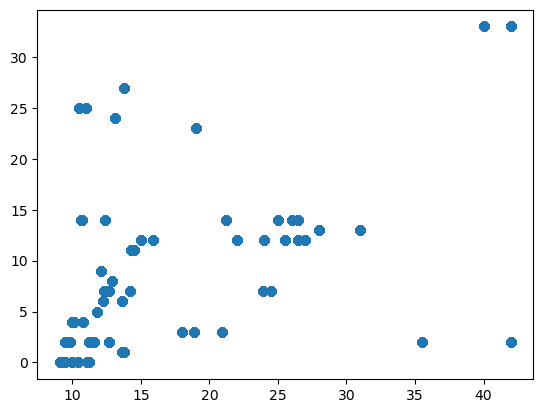

In [27]:
##相関関係　： 築年数&家賃
plt.scatter(data_complete["家賃金額"], data_complete["築年数数字"])

In [28]:
res3=data_complete["家賃金額"].corr(data_complete["築年数数字"]) 
res3

0.49680619612143434

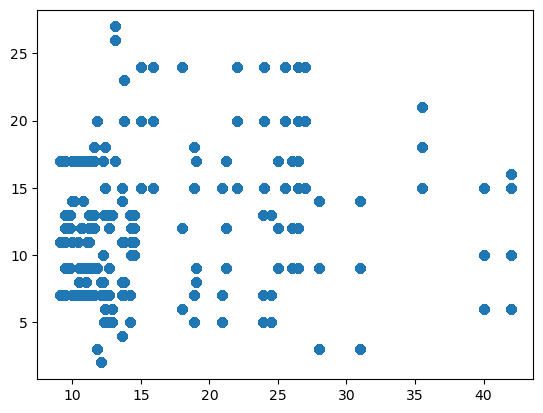

In [29]:
##相関関係　： 徒歩&家賃
plt.scatter(data_complete["家賃金額"], data_complete["walk"])

In [30]:
res=data_complete["家賃金額"].corr(data_complete["walk"]) 
res

0.11247503405438639

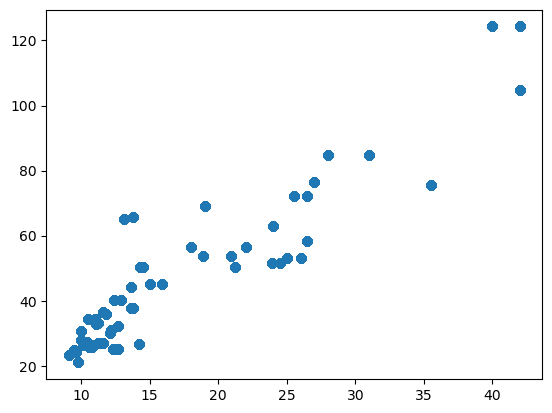

In [31]:
##相関関係　： 平米数&家賃
plt.scatter(data_complete["家賃金額"], data_complete["平米数"])

In [32]:
res2=data_complete["家賃金額"].corr(data_complete["平米数"]) 
res2

0.9247865771188718

(array([64452., 33012.,  6288.,  7860.,  7860., 14148.,  1572.,     0.,
         1572.,  7860.]),
 array([ 9.1 , 12.39, 15.68, 18.97, 22.26, 25.55, 28.84, 32.13, 35.42,
        38.71, 42.  ]),
 <BarContainer object of 10 artists>)

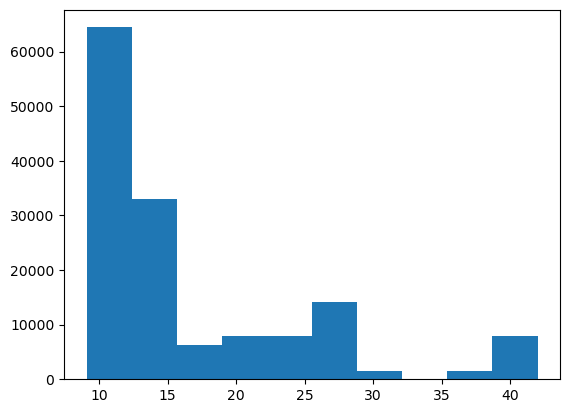

In [33]:
plt.hist(data_complete["家賃金額"])

(array([51876., 29868., 17292., 18864., 11004.,  4716.,  3144.,     0.,
         1572.,  6288.]),
 array([ 21.01 ,  31.338,  41.666,  51.994,  62.322,  72.65 ,  82.978,
         93.306, 103.634, 113.962, 124.29 ]),
 <BarContainer object of 10 artists>)

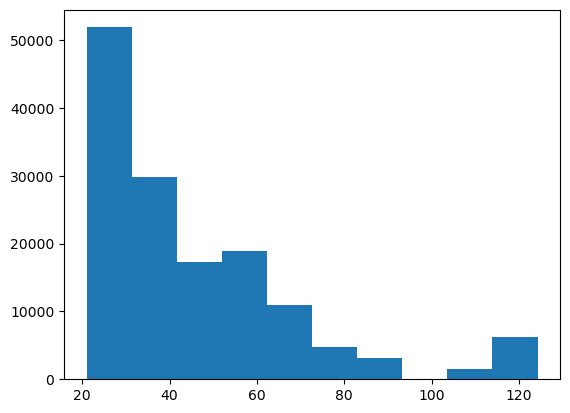

In [34]:
plt.hist(data_complete["平米数"])

(array([ 3144.,  8384., 41920., 12576., 37204.,  9956., 16768.,  6812.,
         5764.,  2096.]),
 array([ 2. ,  4.5,  7. ,  9.5, 12. , 14.5, 17. , 19.5, 22. , 24.5, 27. ]),
 <BarContainer object of 10 artists>)

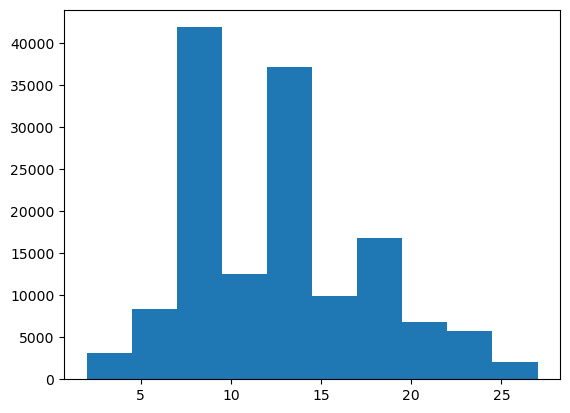

In [35]:
plt.hist(data_complete["walk"])

(array([58164., 12576., 11004., 25152., 18864.,     0.,  1572.,  9432.,
         1572.,  6288.]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <BarContainer object of 10 artists>)

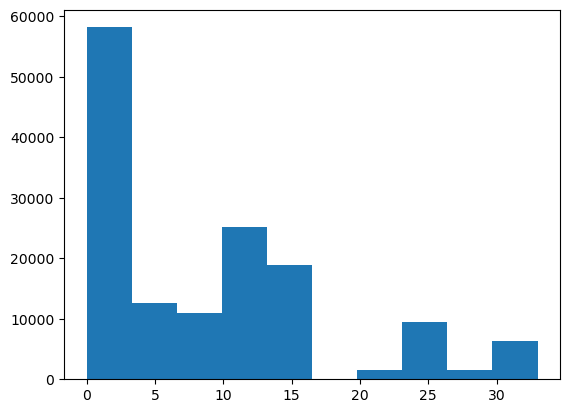

In [36]:
plt.hist(data_complete["築年数数字"])

分析について

In [37]:
#手順
#1: 分析のロジック策定（重回帰？）
#2インタラクティブアプリの作成（ユーザーが自分の情報を入力し、予測してくれる＋散布図の中でプロット）

In [38]:
#1重回帰分析
df = data_complete
df.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,...,間取り,面積,URL,徒歩分,徒歩,walk,家賃金額,平米数,築年数test,築年数数字
0,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/千歳烏山駅 歩11分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩11分,歩11,11,13.8,65.72,築27,27
1,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/芦花公園駅 歩20分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩20分,歩20,20,13.8,65.72,築27,27
2,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/仙川駅 歩23分,築27年,3階建,1階,13.8万円,-,13.8万円,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩23分,歩23,23,13.8,65.72,築27,27
3,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/千歳船橋駅 歩6分,築3年,3階建,2階,18万円,5000円,-,...,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩6分,歩6,6,18.0,56.50,築3,3
4,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/経堂駅 歩12分,築3年,3階建,2階,18万円,5000円,-,...,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩12分,歩12,12,18.0,56.50,築3,3


In [39]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=bcfa64d775a8fa1887e9bcd38b8f42852196527e492b3a7b33155cfc6d16cf97
  Stored in directory: /Users/naokismacbookair/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.linear_model import LinearRegression as LR

In [41]:
#テストデータと学習データを作成
df.to_excel("all-data.xlsx")


/Users/naokismacbookair/opt/anaconda3/lib/python3.9/site-packages/xlsxwriter/worksheet.py:1179: UserWarning: Ignoring URL 'https://suumo.jp/chintai/jnc_000077257457/?bc=100286284928' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
/Users/naokismacbookair/opt/anaconda3/lib/python3.9/site-packages/xlsxwriter/worksheet.py:1179: UserWarning: Ignoring URL 'https://suumo.jp/chintai/jnc_000062274318/?bc=100286373764' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
/Users/naokismacbookair/opt/anaconda3/lib/python3.9/site-packages/xlsxwriter/worksheet.py:1179: UserWarning: Ignoring URL 'https://suumo.jp/chintai/jnc_000077283885/?bc=100299843909' since it exceeds Excel's limit of 65,530 URLS per worksheet.
  warn("Ignoring URL '%s' since it exceeds Excel's limit of "
/Users/naokismacbookair/opt/anaconda3/lib/python3.9/site-packages/xlsxwriter/works

In [42]:
#手動分割（Pythonでの実装を検討すべき）
train = pd.read_excel("train-suumo.xlsx")
test = pd.read_excel("test-suumo.xlsx")

train.head()

,Unnamed: 0,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,...,間取り,面積,URL,徒歩分,徒歩,walk,家賃金額,平米数,築年数test,築年数数字
0,0,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/千歳烏山駅 歩11分,築27年,3階建,1階,13.8万円,-,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩11分,歩11,11,13.8,65.72,築27,27
1,1,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/芦花公園駅 歩20分,築27年,3階建,1階,13.8万円,-,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩20分,歩20,20,13.8,65.72,築27,27
2,2,シンセリティ北烏山,賃貸マンション,東京都世田谷区北烏山６,京王線/仙川駅 歩23分,築27年,3階建,1階,13.8万円,-,...,3LDK,65.72m2,https://suumo.jp/chintai/jnc_000077135145/?bc=...,歩23分,歩23,23,13.8,65.72,築27,27
3,3,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/千歳船橋駅 歩6分,築3年,3階建,2階,18万円,5000円,...,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩6分,歩6,6,18.0,56.50,築3,3
4,4,サントーレア経堂,賃貸アパート,東京都世田谷区経堂４,小田急線/経堂駅 歩12分,築3年,3階建,2階,18万円,5000円,...,2LDK,56.5m2,https://suumo.jp/chintai/jnc_000076182006/?bc=...,歩12分,歩12,12,18.0,56.50,築3,3


In [43]:
#データの正規化
from sklearn import preprocessing
mm = preprocessing.MinMaxScaler()

In [44]:
train_test = train[["築年数数字", "平米数", "walk"]]
train_test

,築年数数字,平米数,walk
0,27,65.72,11
1,27,65.72,20
2,27,65.72,23
3,3,56.50,6
4,3,56.50,12
...,...,...,...
99996,14,26.31,9
99997,14,50.34,9
99998,14,53.13,9
99999,14,53.13,9


In [45]:
#正規化
train_nm = mm.fit_transform(train_test)
train_nm

array([[0.81818182, 0.43290085, 0.36      ],
       [0.81818182, 0.43290085, 0.72      ],
       [0.81818182, 0.43290085, 0.84      ],
       ...,
       [0.42424242, 0.31099923, 0.28      ],
       [0.42424242, 0.31099923, 0.28      ],
       [0.42424242, 0.31099923, 0.28      ]])

In [46]:
#正規化したものをDF化
df_train = pd.DataFrame(train_nm)
df_train

,0,1,2
0,0.818182,0.432901,0.36
1,0.818182,0.432901,0.72
2,0.818182,0.432901,0.84
3,0.090909,0.343629,0.16
4,0.090909,0.343629,0.40
...,...,...,...
99996,0.424242,0.051317,0.28
99997,0.424242,0.283985,0.28
99998,0.424242,0.310999,0.28
99999,0.424242,0.310999,0.28


In [47]:
df = df_train
df_train = df.rename(columns={0: "築年数数字", 1: "平米数", 2: "walk"})
df_train

,築年数数字,平米数,walk
0,0.818182,0.432901,0.36
1,0.818182,0.432901,0.72
2,0.818182,0.432901,0.84
3,0.090909,0.343629,0.16
4,0.090909,0.343629,0.40
...,...,...,...
99996,0.424242,0.051317,0.28
99997,0.424242,0.283985,0.28
99998,0.424242,0.310999,0.28
99999,0.424242,0.310999,0.28


In [48]:
#正規化＝test data
test = test[["築年数数字", "平米数", "walk"]]
test

,築年数数字,平米数,walk
0,14,53.13,9
1,14,53.13,9
2,14,58.38,9
3,14,25.74,12
4,14,25.74,12
...,...,...,...
44618,2,27.10,12
44619,2,27.11,12
44620,2,27.10,12
44621,2,27.11,12


In [49]:
test_nm = mm.fit_transform(test)
test_nm

array([[0.42424242, 0.31099923, 0.28      ],
       [0.42424242, 0.31099923, 0.28      ],
       [0.42424242, 0.36183191, 0.28      ],
       ...,
       [0.06060606, 0.05896592, 0.4       ],
       [0.06060606, 0.05906274, 0.4       ],
       [0.06060606, 0.10815259, 0.4       ]])

In [50]:
df_test = pd.DataFrame(test_nm)
df_test

,0,1,2
0,0.424242,0.310999,0.28
1,0.424242,0.310999,0.28
2,0.424242,0.361832,0.28
3,0.424242,0.045798,0.40
4,0.424242,0.045798,0.40
...,...,...,...
44618,0.060606,0.058966,0.40
44619,0.060606,0.059063,0.40
44620,0.060606,0.058966,0.40
44621,0.060606,0.059063,0.40


In [51]:
df2 = df_train
df_test = df2.rename(columns={0: "築年数数字", 1: "平米数", 2: "walk"})
df_test

,築年数数字,平米数,walk
0,0.818182,0.432901,0.36
1,0.818182,0.432901,0.72
2,0.818182,0.432901,0.84
3,0.090909,0.343629,0.16
4,0.090909,0.343629,0.40
...,...,...,...
99996,0.424242,0.051317,0.28
99997,0.424242,0.283985,0.28
99998,0.424242,0.310999,0.28
99999,0.424242,0.310999,0.28


In [52]:
df_train

,築年数数字,平米数,walk
0,0.818182,0.432901,0.36
1,0.818182,0.432901,0.72
2,0.818182,0.432901,0.84
3,0.090909,0.343629,0.16
4,0.090909,0.343629,0.40
...,...,...,...
99996,0.424242,0.051317,0.28
99997,0.424242,0.283985,0.28
99998,0.424242,0.310999,0.28
99999,0.424242,0.310999,0.28


In [53]:
df_test

,築年数数字,平米数,walk
0,0.818182,0.432901,0.36
1,0.818182,0.432901,0.72
2,0.818182,0.432901,0.84
3,0.090909,0.343629,0.16
4,0.090909,0.343629,0.40
...,...,...,...
99996,0.424242,0.051317,0.28
99997,0.424242,0.283985,0.28
99998,0.424242,0.310999,0.28
99999,0.424242,0.310999,0.28


In [54]:
#重回帰分析
model = LR()

In [55]:
#目的変数
data.head()
target_data = pd.DataFrame(train["家賃金額"])
target_data


,家賃金額
0,13.8
1,13.8
2,13.8
3,18.0
4,18.0
...,...
99996,10.7
99997,21.2
99998,25.0
99999,26.0


In [56]:
model.fit(target_data, df_train)

LinearRegression()

In [57]:
model.coef_

array([[0.0153572 ],
       [0.02544176],
       [0.00263497]])

In [58]:
model.intercept_

array([ 0.01891467, -0.18724738,  0.36207787])

In [59]:
model.score(target_data, df_train)

#とりあえず完成

0.3714331065161646

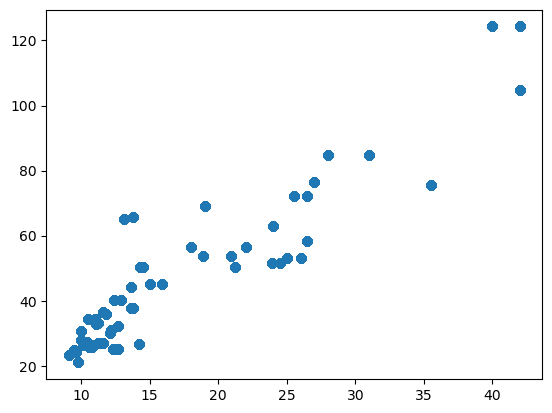

In [60]:
#散布図へPlot
plt.scatter(data_complete["家賃金額"], data_complete["平米数"])

In [61]:
#インプットを受け取る
user_input_m2 = input("平米数を書いてね（数字だけでいいよ）：")


平米数を書いてね（数字だけでいいよ）：1


In [62]:
user_input_m2 = int(user_input_m2)

In [63]:
user_input_yachin = int(input("家賃を書いてね(数字だけでいいよ)："))

家賃を書いてね(数字だけでいいよ)：1


In [64]:
user_input_yachin = int(user_input_yachin)

In [65]:

#DataFrame へ変換
new_input_data = pd.DataFrame(
    data={'家賃金額': user_input_yachin, 
          '平米数': user_input_m2},
    index=[0]
)


In [66]:
#元々のDataFrameへMerge
origin_data = data_complete[["家賃金額", "平米数"]]
merged_data= origin_data.append(new_input_data)

/var/folders/9j/g3nm72s54g5df75_4gzcrxth0000gn/T/ipykernel_56606/4107955816.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data= origin_data.append(new_input_data)


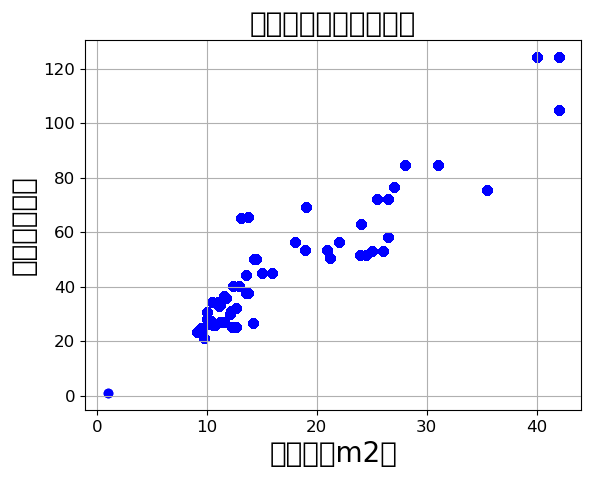

In [72]:
#散布図の作成

plt.title('家賃と平米数の相関図',
                      fontsize=20) # タイトル
plt.xlabel("平米数（m2）", fontsize=20) # x軸ラベル
plt.ylabel("家賃（万円）", fontsize=20) # y軸ラベル
plt.grid(True) # 目盛線の表示
plt.tick_params(labelsize = 12) # 目盛線のラベルサイズ

plt.scatter(merged_data["家賃金額"], merged_data["平米数"], c="b", label="世の中の平均")

#散布図の関数化
plot_data = plt.scatter(merged_data["家賃金額"], merged_data["平米数"], c="b", label="世の中の平均")

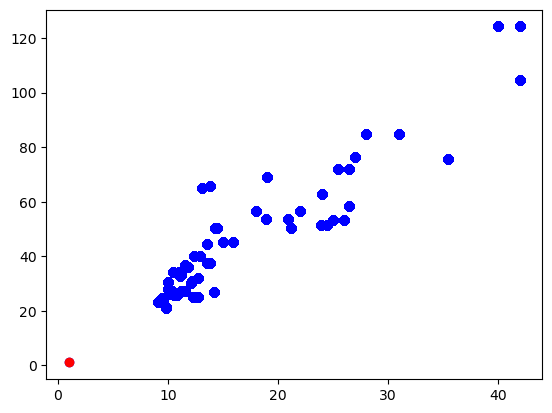

In [68]:
#ユーザーがプロットした場所のカラーを入れるTest

plt.scatter(merged_data["家賃金額"], merged_data["平米数"], c="b", label="世の中の平均")
plt.scatter(user_input_yachin, user_input_m2, c="r", label="あなたのデータ") 

In [69]:
#まとめ
#日本語化
%matplotlib inline
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np

user_input_m2 = input("平米数を書いてね（数字だけでいいよ）：")
user_input_m2 = int(user_input_m2)
user_input_yachin = int(input("家賃を書いてね(数字だけでいいよ)："))
user_input_yachin = int(user_input_yachin)

#DataFrame へ変換
new_input_data = pd.DataFrame(
    data={'家賃金額': user_input_yachin, 
          '平米数': user_input_m2},
    index=[0]
)

#元々のDataFrameへMerge
origin_data = data_complete[["家賃金額", "平米数"]]
merged_data= origin_data.append(new_input_data)

#散布図の作成

plt.title('家賃と平米数の相関図',
                      fontsize=20) # タイトル
plt.xlabel("平米数（m2）", fontsize=20) # x軸ラベル
plt.ylabel("家賃（万円）", fontsize=20) # y軸ラベル
plt.grid(True) # 目盛線の表示
plt.tick_params(labelsize = 12) # 目盛線のラベルサイズ

plt.scatter(merged_data["平米数"],merged_data["家賃金額"], c="b", label="世の中の平均")
plt.scatter(user_input_m2, user_input_yachin, c="r", label="あなたのデータ") 

print("あなたが希望している物件の家賃"+str(user_input_yachin)+"万円")
print("あなたが希望している物件の平米数"+str(user_input_m2)+"m2")

#ここから相場との比較をしたい
#同じ平米数の家の平均値よりxx円安いよ的な

ModuleNotFoundError: No module named 'japanize_matplotlib'

In [70]:
pip install japanize_matplotlib

  Using cached japanize-matplotlib-1.1.3.tar.gz (4.1 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=043b0a1a0efc8a3b8dd0a455800c77906626820bc3143a5c8191bcfe3ca092d2
  Stored in directory: /Users/naokismacbookair/Library/Caches/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize_matplotlib
Note: you may need to restart the kernel to use updated packages.


In [73]:
#単回帰分析
df.head(5)

,0,1,2
0,0.818182,0.432901,0.36
1,0.818182,0.432901,0.72
2,0.818182,0.432901,0.84
3,0.090909,0.343629,0.16
4,0.090909,0.343629,0.40


In [74]:
target_data.head()

,家賃金額
0,13.8
1,13.8
2,13.8
3,18.0
4,18.0


In [76]:
x = target_data
y = df[1]

In [75]:
import seaborn as sns

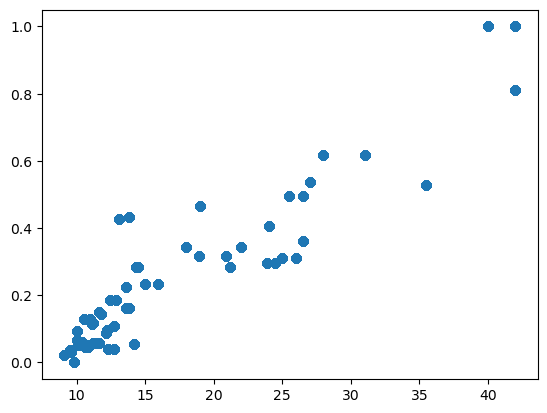

In [77]:
plt.plot(x, y, 'o')
plt.show()

In [80]:
model_lr = LinearRegression()

In [79]:
from sklearn.linear_model import LinearRegression

In [81]:
model_lr.fit(x, y)

LinearRegression()

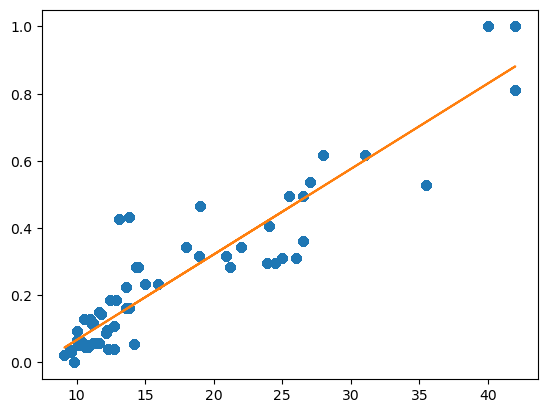

モデル関数の回帰変数 w1: 0.025
モデル関数の切片 w2: -0.187
y= 0.025x + -0.187
決定係数 R^2：  0.8550809181247158


In [82]:
plt.plot(x, y, 'o')
plt.plot(x, model_lr.predict(x), linestyle="solid")
plt.show()

print('モデル関数の回帰変数 w1: %.3f' %model_lr.coef_)
print('モデル関数の切片 w2: %.3f' %model_lr.intercept_)
print('y= %.3fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
print('決定係数 R^2： ', model_lr.score(x, y))

In [ ]:
append.data_complete["家賃金額"]

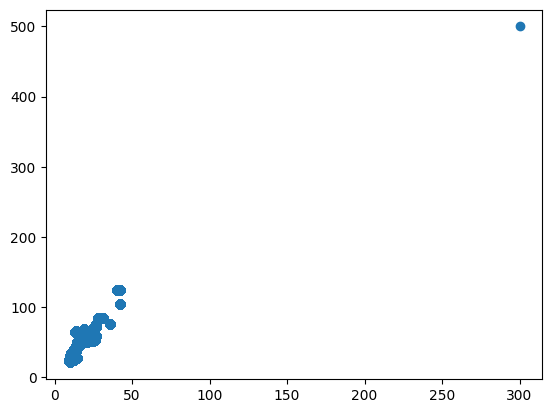

In [300]:
#実験

test = [300]
test2 = [500]


test_data = pd.DataFrame(
    data={'家賃金額': test, 
          '平米数': test2}
)



test1234 = data_complete[["家賃金額", "平米数"]]


plt.scatter(test_111["家賃金額"], test_111["平米数"])

In [293]:
test_data = pd.DataFrame(
    data={'家賃金額': test, 
          '平米数': test2}
)
test_data

,家賃金額,平米数
0,300,500
